 # Gender classification using keras API

In [ ]:
import numpy as np  # Data manipulation
import pandas as pd # Dataframe manipulation 
import matplotlib.pyplot as plt # Plotting the data and the results
import matplotlib.image as mpimg # For displaying imagees
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

from keras import models
from keras import layers
import keras.preprocessing  as kp
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive', force_remount=True)
GLOBAL_PATH = "/content/gdrive/MyDrive/Lab-Proj/"
MODELS_PATH = f"{GLOBAL_PATH}models/"
LOCAL_PATH = "/content/Dataset/"
PATH_PROJ = GLOBAL_PATH + "archive2.zip"
PATH_TESTING = GLOBAL_PATH + "gender-testing"

Mounted at /content/gdrive


In [ ]:
!unzip -o $PATH_TESTING 

Streaming output truncated to the last 5000 lines.
  inflating: Validation/male/067031.jpg.jpg  
  inflating: Validation/male/067038.jpg.jpg  
  inflating: Validation/male/067040.jpg.jpg  
  inflating: Validation/male/067046.jpg.jpg  
  inflating: Validation/male/067048.jpg.jpg  
  inflating: Validation/male/067054.jpg.jpg  
  inflating: Validation/male/067064.jpg.jpg  
  inflating: Validation/male/067068.jpg.jpg  
  inflating: Validation/male/067069.jpg.jpg  
  inflating: Validation/male/067086.jpg.jpg  
  inflating: Validation/male/067091.jpg.jpg  
  inflating: Validation/male/067099.jpg.jpg  
  inflating: Validation/male/067101.jpg.jpg  
  inflating: Validation/male/067102.jpg.jpg  
  inflating: Validation/male/067112.jpg.jpg  
  inflating: Validation/male/067117.jpg.jpg  
  inflating: Validation/male/067119.jpg.jpg  
  inflating: Validation/male/067133.jpg.jpg  
  inflating: Validation/male/067143.jpg.jpg  
  inflating: Validation/male/067152.jpg.jpg  
  inflating: Validation/male/

In [ ]:
!unzip -o $PATH_PROJ

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/Validation/Male/189674.jpg  
  inflating: Dataset/Validation/Male/189675.jpg  
  inflating: Dataset/Validation/Male/189676.jpg  
  inflating: Dataset/Validation/Male/189679.jpg  
  inflating: Dataset/Validation/Male/189681.jpg  
  inflating: Dataset/Validation/Male/189684.jpg  
  inflating: Dataset/Validation/Male/189688.jpg  
  inflating: Dataset/Validation/Male/189689.jpg  
  inflating: Dataset/Validation/Male/189691.jpg  
  inflating: Dataset/Validation/Male/189692.jpg  
  inflating: Dataset/Validation/Male/189693.jpg  
  inflating: Dataset/Validation/Male/189694.jpg  
  inflating: Dataset/Validation/Male/189695.jpg  
  inflating: Dataset/Validation/Male/189696.jpg  
  inflating: Dataset/Validation/Male/189697.jpg  
  inflating: Dataset/Validation/Male/189698.jpg  
  inflating: Dataset/Validation/Male/189702.jpg  
  inflating: Dataset/Validation/Male/189704.jpg  
  inflating: Dataset/Validation/Male/189705.jpg  

# Data

## Plot Data

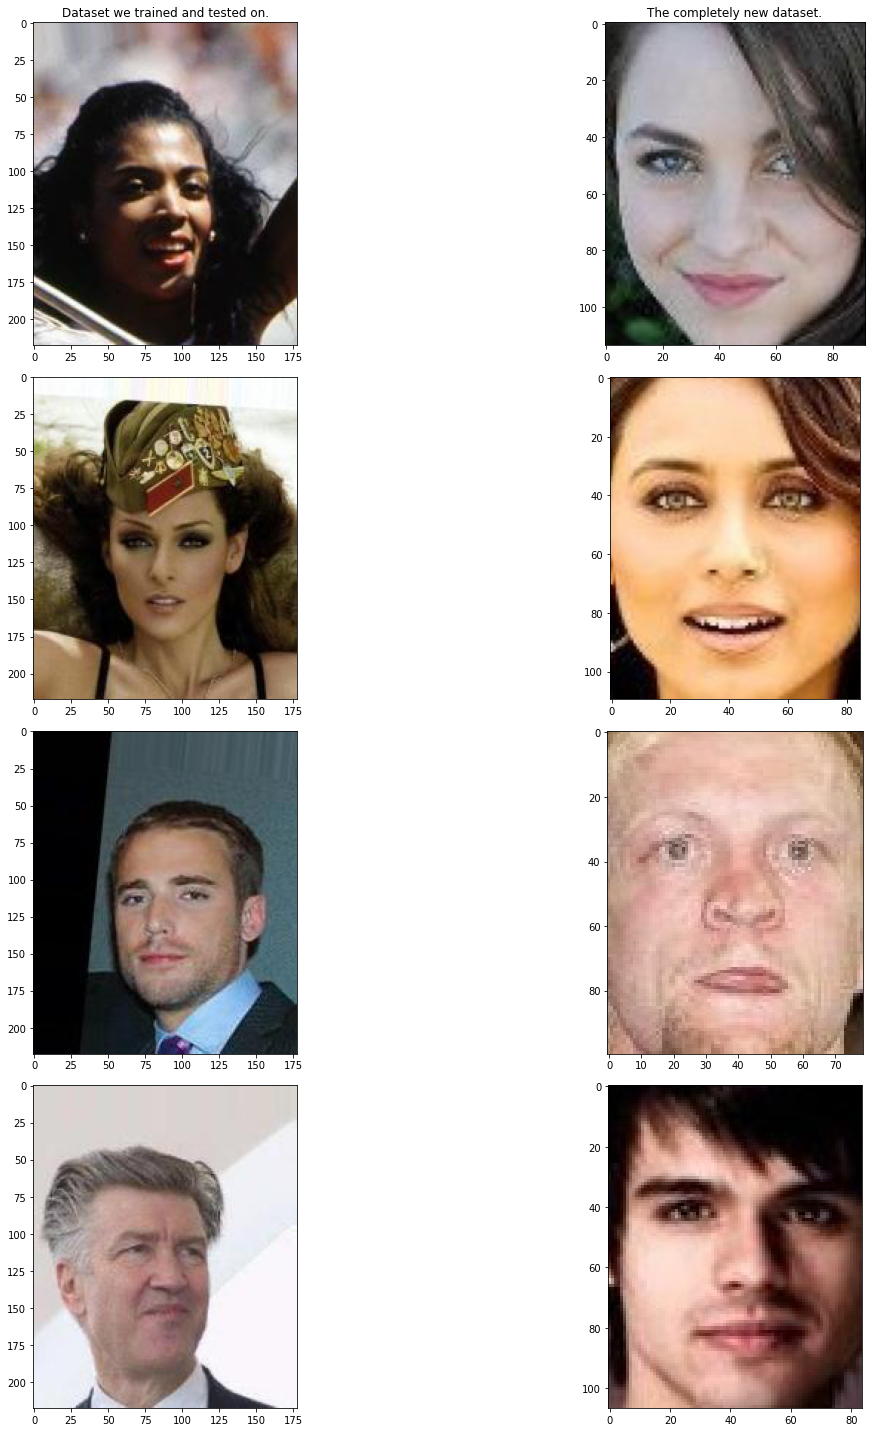

In [ ]:
fig,ax=plt.subplots(ncols=2,nrows=4,figsize=(20,20))
img1 = mpimg.imread('/content//Dataset/Test/Female/160003.jpg')
ax[0][0].imshow(img1)
ax[0][0].set_title("Dataset we trained and tested on.")
img2 = mpimg.imread('/content/Training/female/131422.jpg.jpg')
ax[0][1].imshow(img2)
ax[0][1].set_title("The completely new dataset.")
img3 =  mpimg.imread('/content/Dataset/Validation/Female/180019.jpg')
ax[1][0].imshow(img3)
img4= mpimg.imread('/content/Validation/female/113010.jpg.jpg')
ax[1][1].imshow(img4)
img5 = mpimg.imread('/content/Dataset/Validation/Male/180028.jpg')
ax[2][0].imshow(img5)
img6 = mpimg.imread('/content/Validation/male/063517.jpg.jpg')
ax[2][1].imshow(img6)
ax[3][0].imshow(mpimg.imread('/content/Dataset/Validation/Male/180073.jpg'))
ax[3][1].imshow(mpimg.imread('/content/Validation/male/063531.jpg.jpg'))
plt.tight_layout()

## Splitting

In [ ]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""
Variables
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""
BATCH_SIZE = 128
IMG_SIZE = (224, 224)

train_dataset = tf.keras.utils.image_dataset_from_directory(f'{LOCAL_PATH}Train',
            shuffle=True,
            batch_size=BATCH_SIZE,
            image_size=IMG_SIZE,
            seed=42)#, validation_split=0.6, subset="training")
validation_dataset = tf.keras.utils.image_dataset_from_directory(f'{LOCAL_PATH}Validation',
            shuffle=True,
            batch_size=BATCH_SIZE,
            image_size=IMG_SIZE,
            seed=42)#, validation_split=0.3, subset="training")
    
class_names = train_dataset.class_names
print( "class_names: " + str( class_names ) )


"""""""""""""""""""""""""""""""""""""""""""""""""""""""""
DataSet
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)



Found 160000 files belonging to 2 classes.
Found 22598 files belonging to 2 classes.
class_names: ['Female', 'Male']
